In [16]:
import matplotlib.pyplot as plt
import numpy as np
from lmfit.models import LinearModel

In [53]:
channel = 0

In [54]:
if channel == 0:
    charges  = np.array([607.2,536.3,  #Co 1 e 2
                         311.8])       #Cs
    sigmas   = np.array([3.5,3.1, 
                         1.8])
    energies = np.array([1333,1173,    #Co 1 e 2
                         661.7])       #Cs

Text(0, 0.5, 'Charge [pC]')

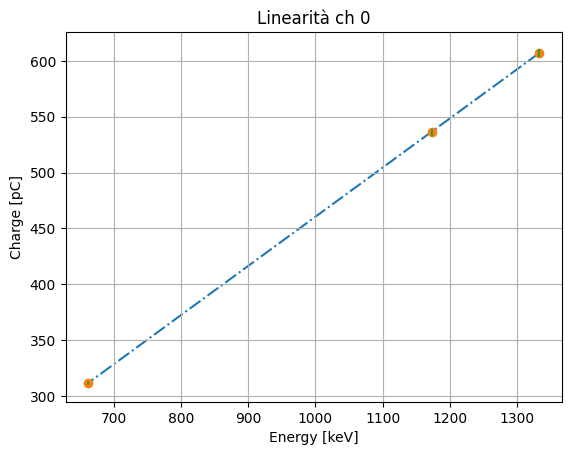

In [55]:
model = LinearModel(prefix = "l")
params = model.guess(charges, x = energies)

result = model.fit(charges, params, x = energies, weights = 1 / sigmas)
comps = result.eval_components()                        #Plotto il best fit + le componenti



plt.plot(energies, result.best_fit, label='Best Fit', zorder = -100, ls = "-.", marker = "")

plt.plot(energies, charges, ls = "", marker = "o")
plt.errorbar(energies, charges, sigmas, ls = "")
plt.title(f'Linearità ch {channel}')
plt.grid()
plt.xlabel("Energy [keV]")
plt.ylabel("Charge [pC]")

In [56]:
print(result.fit_report())

[[Model]]
    Model(linear, prefix='l')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 3
    # variables        = 2
    chi-square         = 0.01440019
    reduced chi-square = 0.01440019
    Akaike info crit   = -12.0173783
    Bayesian info crit = -13.8201537
    R-squared          = 0.99999970
[[Variables]]
    lslope:      0.43966958 +/- 5.9708e-04 (0.14%) (init = 0.4398068)
    lintercept:  20.8480962 +/- 0.55255810 (2.65%) (init = 20.70803)
[[Correlations]] (unreported correlations are < 0.100)
    C(lslope, lintercept) = -0.9511
